# Customer Satisfaction Prediction

In [1]:
# importing necessary libraries

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#loading the dataset

# Loading the dataset
data = pd.read_csv('Passenger_Satisfaction.csv')

df = data.copy()
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
# Shape of the data frame
df.shape

(103904, 25)

In [4]:
#data types and other columns info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [5]:
#null values check
df.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [6]:
# dropping null values at rows

df.dropna(axis = 0, inplace = True)

In [7]:
# checking if null values are dropped
df.isna().sum().sum()

0

In [8]:
# Getting the statistical summary of the dataset
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,103594.0,51950.102274,29997.914016,0.0,25960.25,51955.5,77924.75,103903.0
id,103594.0,64942.428625,37460.816597,1.0,32562.25,64890.0,97370.50,129880.0
Age,103594.0,39.380466,15.113125,7.0,27.00,40.0,51.00,85.0
Flight Distance,103594.0,1189.325202,997.297235,31.0,414.00,842.0,1743.00,4983.0
Inflight wifi service,103594.0,2.729753,1.327866,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,103594.0,3.060081,1.525233,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103594.0,2.756984,1.398934,0.0,2.00,3.0,4.00,5.0
Gate location,103594.0,2.977026,1.277723,0.0,2.00,3.0,4.00,5.0
Food and drink,103594.0,3.202126,1.329401,0.0,2.00,3.0,4.00,5.0
Online boarding,103594.0,3.250497,1.349433,0.0,2.00,3.0,4.00,5.0


In [9]:
# drop the Unamned , id column since it adds no value for our model training
df.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)

In [10]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


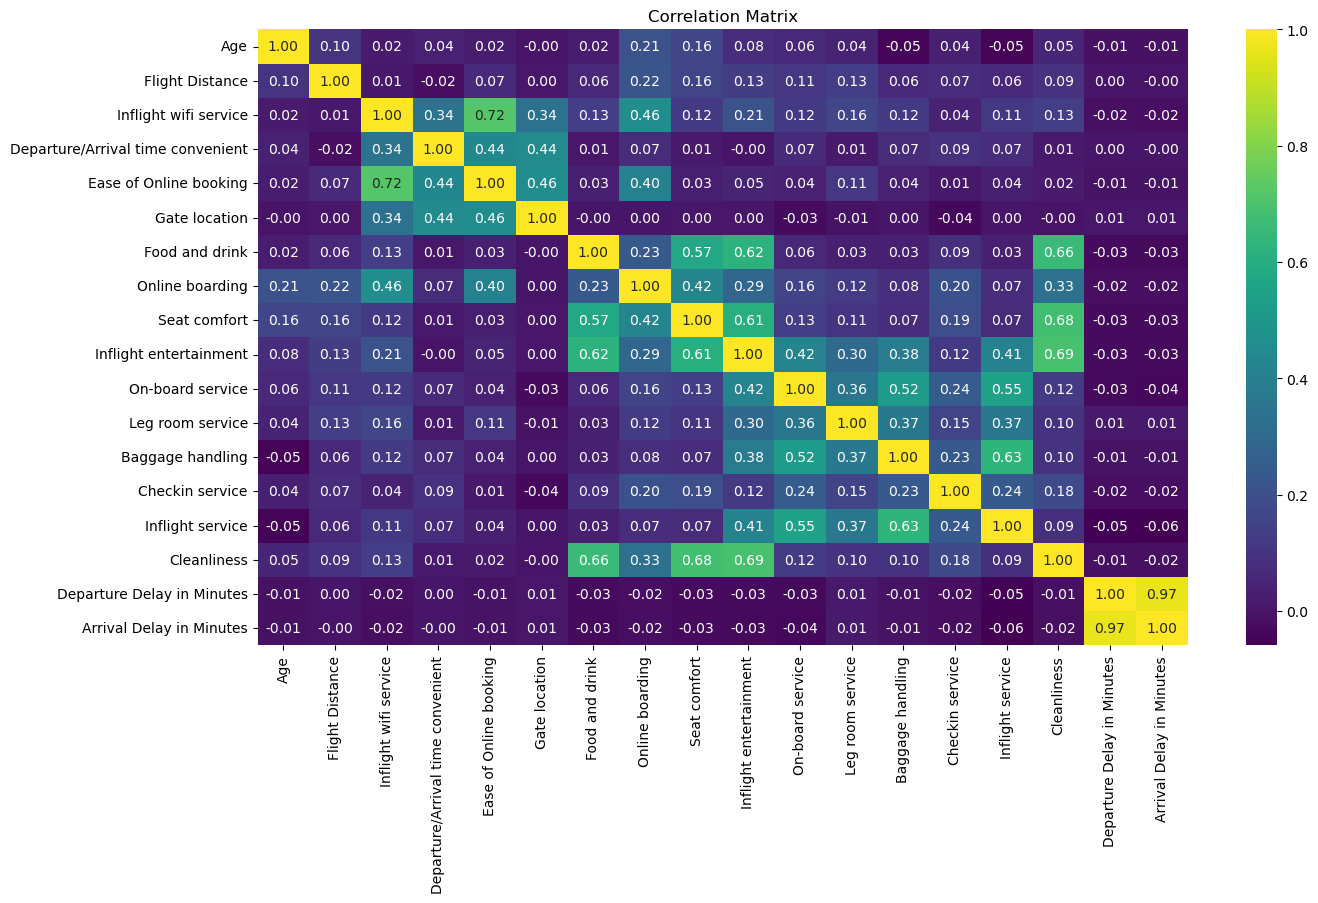

In [11]:
#correlation matrix to visualize the relationships between different features in the dataset.

corr = df.corr(numeric_only = True)
plt.figure(figsize=(15,8))
plt.title("Correlation Matrix")
sns.heatmap(corr, annot = True, fmt = ".2f", cmap = "viridis")
plt.show()

In [15]:
data["Type of Travel"].replace(["Business travel"], "Business Travel", inplace = True)
df["Type of Travel"].replace(["Business travel"], "Business Travel", inplace = True)

data["Customer Type"].replace(["disloyal Customer"], "Disloyal Customer", inplace = True)
df["Customer Type"].replace(["disloyal Customer"], "Disloyal Customer", inplace = True)


In [14]:
df["Type of Travel"].unique()

array(['Personal Travel', 'Business Travel'], dtype=object)

In [16]:
X = df.drop('satisfaction',axis=1)
X.head()
X.to_csv('Clean_data.csv')
  

## Data Visualizations

In [17]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

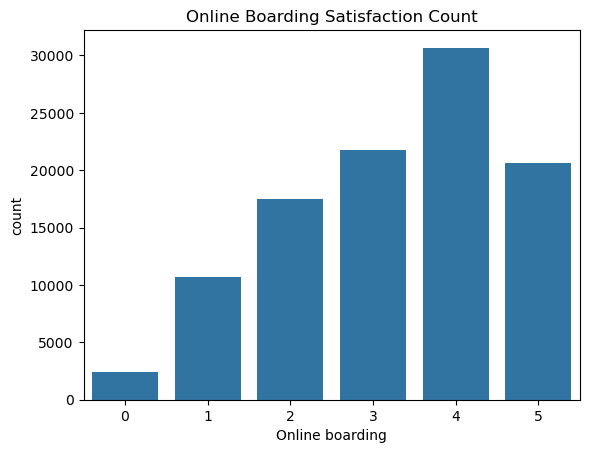

In [18]:
# count plot of classes in Online Boarding ratings 
sns.countplot(x = "Online boarding", data = df)
plt.title("Online Boarding Satisfaction Count")
plt.show()

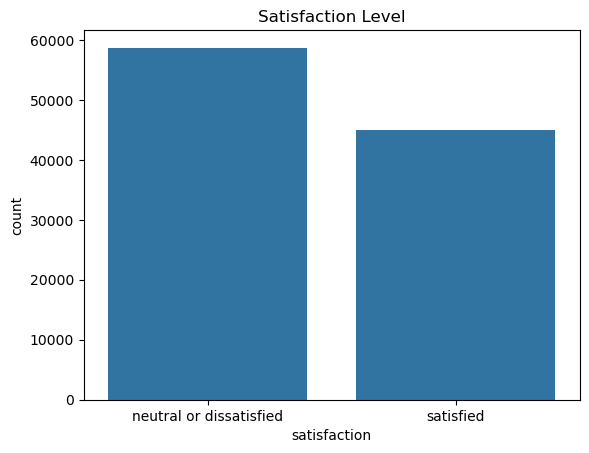

In [19]:
# count plot of classes in Online Boarding ratings 
sns.countplot(x = "satisfaction", data = df)
plt.title("Satisfaction Level")
plt.show()

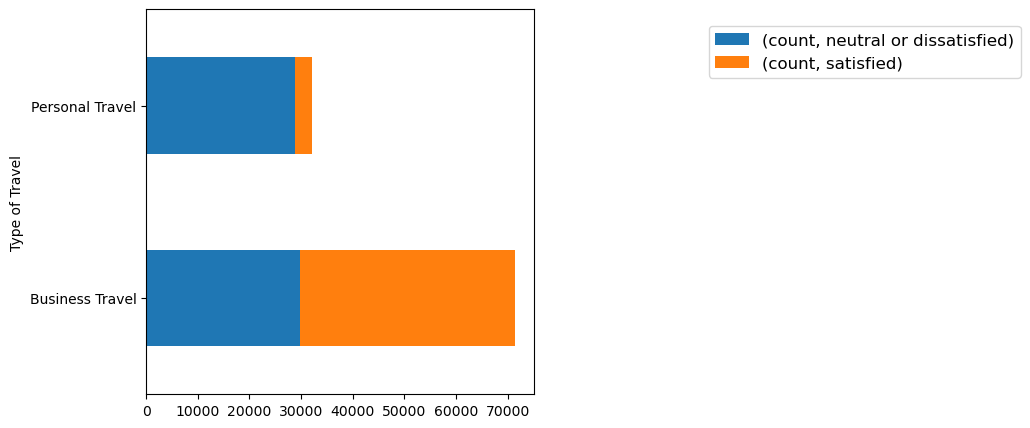

In [20]:
# Type of Travel

pd.DataFrame(df.groupby('Type of Travel')['satisfaction'].value_counts()).unstack().plot.barh(figsize=(5,5),stacked=True)
plt.legend(bbox_to_anchor=(2.3, 1), loc='upper right', borderaxespad=1, fontsize=12)
plt.show()


Personal travelers tend to be more neutral or dissatisfied, while business travelers are generally more satisfied.

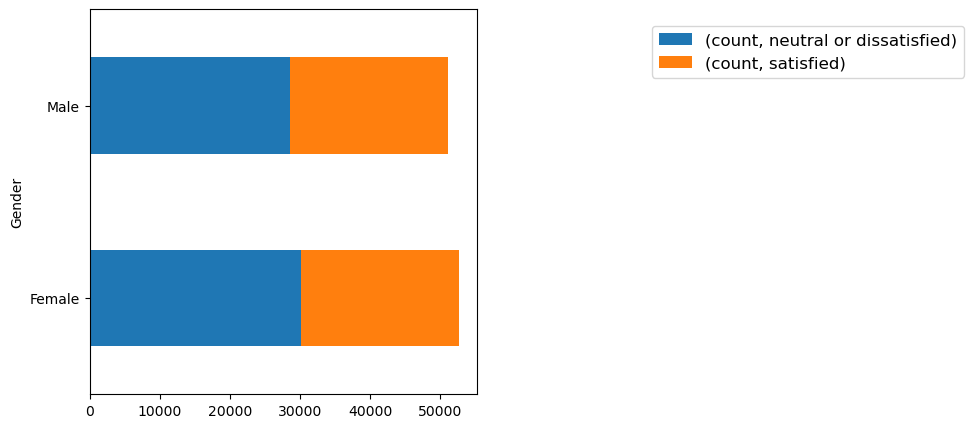

In [21]:
# Gender
pd.DataFrame(df.groupby('Gender')['satisfaction'].value_counts()).unstack().plot.barh(figsize=(5,5),stacked=True)
plt.legend(bbox_to_anchor=(2.3, 1), loc='upper right', borderaxespad=1, fontsize=12)
plt.show()


The bar plot indicates that customer satisfaction is generally higher among females, with a larger proportion of females being satisfied compared to males.

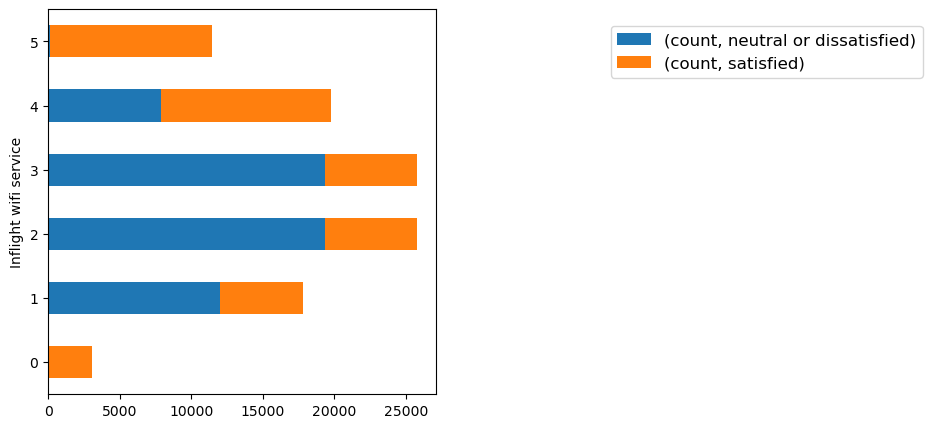

In [22]:
# count plot of classes in Inflight Entertainment ratings

pd.DataFrame(df.groupby("Inflight wifi service")['satisfaction'].value_counts()).unstack().plot.barh(figsize=(5,5),stacked=True)
plt.legend(bbox_to_anchor=(2.3, 1), loc='upper right', borderaxespad=1, fontsize=12)
plt.show()


The above plot indicates that higher inflight WiFi service ratings correspond to higher customer satisfaction, with more satisfied customers as the rating increases.

## ML Models

In [23]:
# ML Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,f1_score, precision_score
from sklearn.preprocessing import StandardScaler
import pickle
import xgboost as xgb


In [24]:
#Column data types
df.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

In [59]:
# label encode our categorical columns 

le = LabelEncoder()

cat = ['satisfaction','Gender','Customer Type','Class','Type of Travel']
for name in cat:
  df[name] = le.fit_transform(df[name])

file_name = "label_encoder.pkl"

pickle.dump(le,open(file_name,"wb"))


In [26]:
# Now we split our predictors and target variable

# our predictors 
X = df.drop(['satisfaction'], axis = 1)

# our target variable
y = df['satisfaction']

In [27]:
# now,splitting the data sets into training and testing with a 80/20 split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0, stratify = y)

In [28]:
#Checking the shape of x_train and x-test shapes
X_train.shape, X_test.shape

((82875, 22), (20719, 22))

In [60]:
# Train XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# Save the model
with open("xgb_model.pkl", "wb") as f:
    pickle.dump(xgb_model, f)


2025/01/22 19:20:50 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '1bd9318b8b4c4d918fb23e1db988baac', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current xgboost workflow
2025/01/22 19:20:52 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\user\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [19:20:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats."


🏃 View run carefree-dog-168 at: http://127.0.0.1:5000/#/experiments/534474054432045102/runs/1bd9318b8b4c4d918fb23e1db988baac
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/534474054432045102


In [30]:
# Make predictions
y_pred = xgb_model.predict(X_test)

In [31]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9639461363965443


In [32]:
# Generate classification report
report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{report}")

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     11740
           1       0.97      0.94      0.96      8979

    accuracy                           0.96     20719
   macro avg       0.97      0.96      0.96     20719
weighted avg       0.96      0.96      0.96     20719



In [33]:
# Generate confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{matrix}")

Confusion Matrix:
[[11496   244]
 [  503  8476]]


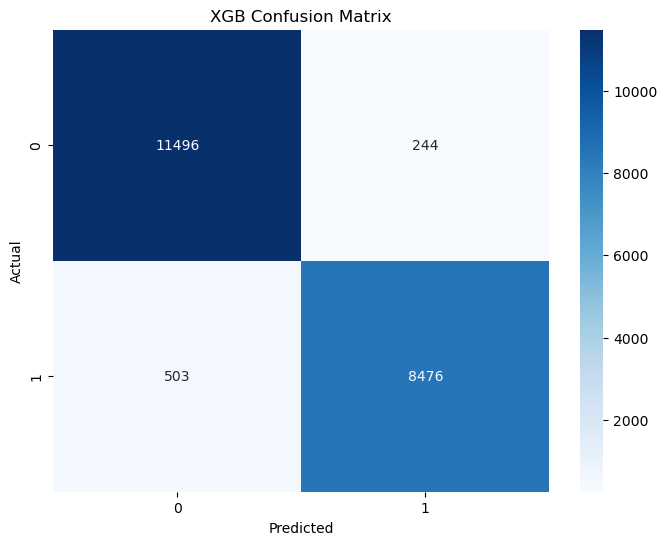

In [34]:
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGB Confusion Matrix')
plt.show()


In [35]:
# Other metrics

from sklearn.metrics import roc_auc_score, f1_score

# Calculate F1 Score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

# Calculate ROC-AUC Score
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc}")


F1 Score: 0.9577942256624669
ROC-AUC Score: 0.9955095108347645


In [38]:
# Get feature importances
importance = xgb_model.feature_importances_

# Create DataFrame
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame
print(feature_importance_df)



                              Feature  Importance
11                    Online boarding    0.389795
3                      Type of Travel    0.157008
6               Inflight wifi service    0.109703
1                       Customer Type    0.060197
4                               Class    0.049246
13             Inflight entertainment    0.043761
17                    Checkin service    0.031604
19                        Cleanliness    0.020017
16                   Baggage handling    0.019823
14                   On-board service    0.018654
12                       Seat comfort    0.017802
18                   Inflight service    0.016793
15                   Leg room service    0.015564
9                       Gate location    0.013970
7   Departure/Arrival time convenient    0.007982
8              Ease of Online booking    0.006047
2                                 Age    0.005439
21           Arrival Delay in Minutes    0.005359
5                     Flight Distance    0.003424


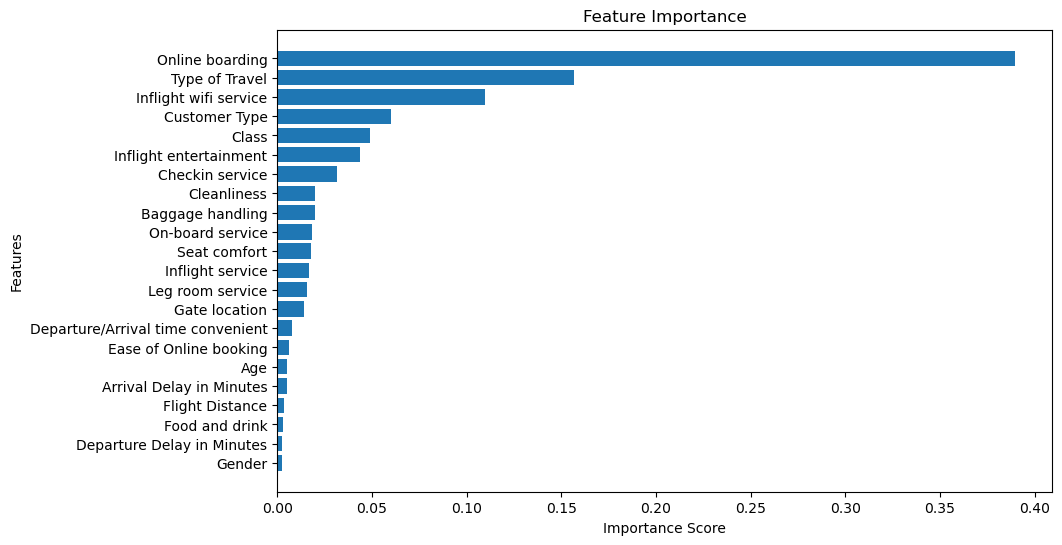

In [39]:
# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()


In [40]:
# creating data frame with the top 10 predictors
columns = ['Online boarding', 'Inflight wifi service', 'Type of Travel', 'Class', 'Inflight entertainment',
            'Seat comfort', 'Ease of Online booking', 'Leg room service', 'Customer Type','Cleanliness', 'satisfaction']

df_new = data[columns]



In [41]:
df_new.dtypes

Online boarding            int64
Inflight wifi service      int64
Type of Travel            object
Class                     object
Inflight entertainment     int64
Seat comfort               int64
Ease of Online booking     int64
Leg room service           int64
Customer Type             object
Cleanliness                int64
satisfaction              object
dtype: object

In [42]:
# print the unique values for categorical values
print(f"satisfaction order is: {df_new['satisfaction'].unique()}")
print(f"Type  of Travel order is: {df_new['Type of Travel'].unique()}")
print(f"Class order is: {df_new['Class'].unique()}")
print(f"Customer Type order is: {df_new['Customer Type'].unique()}")

satisfaction order is: ['neutral or dissatisfied' 'satisfied']
Type  of Travel order is: ['Personal Travel' 'Business Travel']
Class order is: ['Eco Plus' 'Business' 'Eco']
Customer Type order is: ['Loyal Customer' 'Disloyal Customer']


In [47]:
# print the labeling for the categorical variables
print(f"satisfaction order is: {df_new['satisfaction'].unique()}")
print(f"Type  of Travel order is: {df_new['Type of Travel'].unique()}")
print(f"Class order is: {df_new['Class'].unique()}")
print(f"Customer Type order is: {df_new['Customer Type'].unique()}")


satisfaction order is: [0 1]
Type  of Travel order is: [1 0]
Class order is: [2 0 1]
Customer Type order is: [1 0]


In [65]:
# label encode the categorical variables again
cat = ['satisfaction','Type of Travel', 'Class', 'Customer Type']

for ct in cat:
  df_new = df_new.copy()
  df_new[ct] = le.fit_transform(df_new[ct])

In [48]:
df_new.dtypes

Online boarding           int64
Inflight wifi service     int64
Type of Travel            int64
Class                     int64
Inflight entertainment    int64
Seat comfort              int64
Ease of Online booking    int64
Leg room service          int64
Customer Type             int64
Cleanliness               int64
satisfaction              int64
dtype: object

In [66]:
# predictors 
X = df_new.drop(['satisfaction'], axis = 1)

# target
y = df_new['satisfaction']

In [50]:
df_new.head()

,Online boarding,Inflight wifi service,Type of Travel,Class,Inflight entertainment,Seat comfort,Ease of Online booking,Leg room service,Customer Type,Cleanliness,satisfaction
0,3,3,1,2,5,5,3,3,1,5,0
1,3,3,0,0,1,1,3,5,0,1,0
2,5,2,0,0,5,5,2,3,1,5,1
3,2,2,0,0,2,2,5,5,1,2,0
4,5,3,0,0,3,5,3,4,1,3,1


In [67]:
file_name = "label_encoder.pkl"

pickle.dump(le,open(file_name,"wb"))

## ML Flow

2025/01/22 18:46:13 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/01/22 18:46:14 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/01/22 18:46:14 INFO mlflow.tracking.fluent: Autologging successfully enabled for xgboost.
2025/01/22 18:46:15 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh()

All git commands will error until this is rectified.

This initial warning can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|none|n|0: for no warning or exception
    - warn|w|warning|1: for a printed warning
    - err

Model Name: LR

Accuracy Score For Training Data: 0.8608086811111245
Accuracy Score For Testing Data: 0.864202877628603
Confusion Matrix For Training Data:
[[42015  5151]
 [ 6419 29538]]
Confusion Matrix For Testing Data:
[[10444  1269]
 [ 1553  7515]]
Classification Report For Training Data:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     47166
           1       0.85      0.82      0.84     35957

    accuracy                           0.86     83123
   macro avg       0.86      0.86      0.86     83123
weighted avg       0.86      0.86      0.86     83123

Classification Report For Testing Data:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     11713
           1       0.86      0.83      0.84      9068

    accuracy                           0.86     20781
   macro avg       0.86      0.86      0.86     20781
weighted avg       0.86      0.86      0.86     20781

------------

2025/01/22 18:46:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


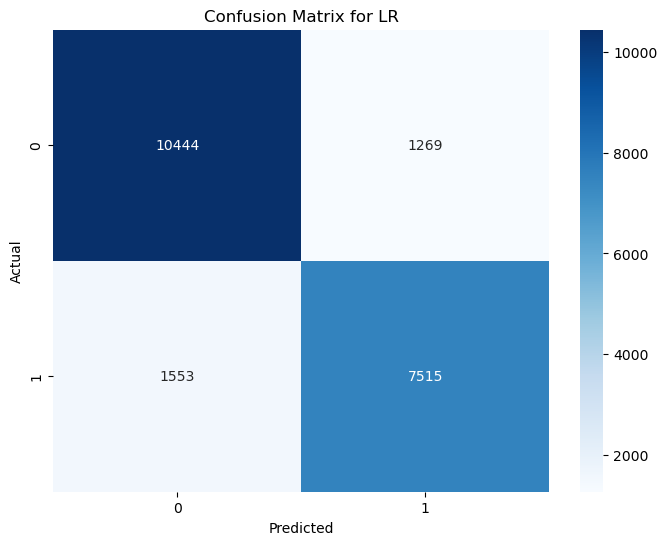

<Figure size 640x480 with 0 Axes>

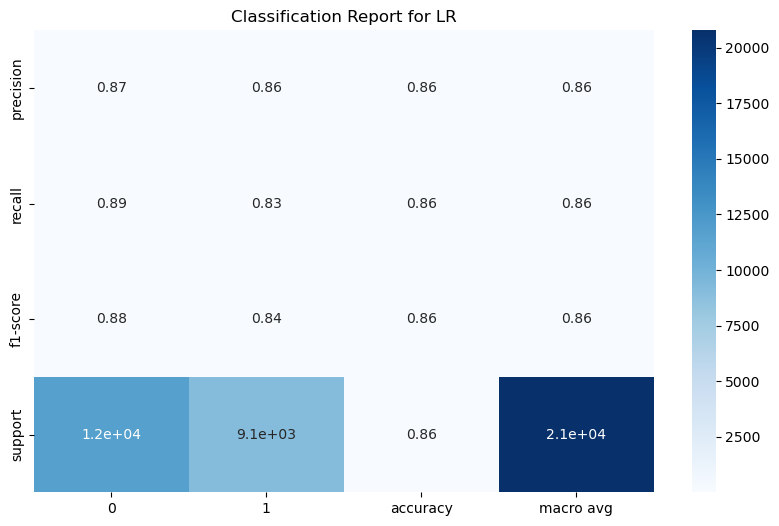

<Figure size 640x480 with 0 Axes>

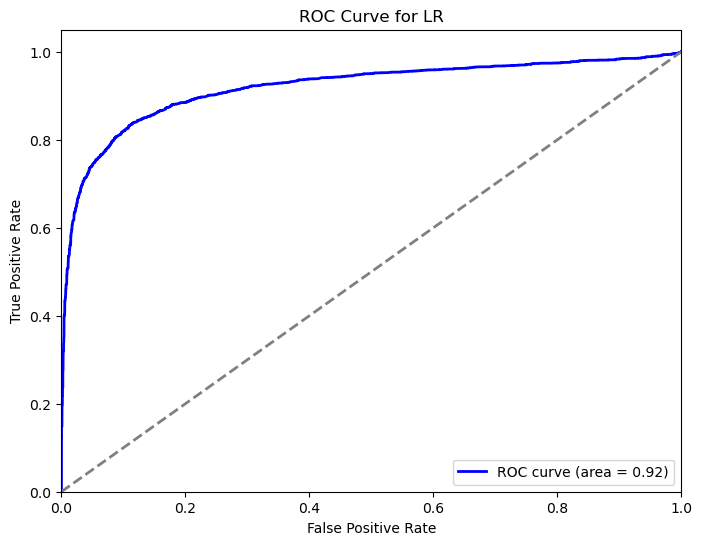

2025/01/22 18:46:43 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'


🏃 View run LR at: http://127.0.0.1:5000/#/experiments/534474054432045102/runs/e24e013cbba74661b3207b17f816d342
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/534474054432045102
Model Name: KNN

Accuracy Score For Training Data: 0.9480288247536783
Accuracy Score For Testing Data: 0.9376834608536644
Confusion Matrix For Training Data:
[[45577  1589]
 [ 2731 33226]]
Confusion Matrix For Testing Data:
[[11240   473]
 [  822  8246]]
Classification Report For Training Data:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     47166
           1       0.95      0.92      0.94     35957

    accuracy                           0.95     83123
   macro avg       0.95      0.95      0.95     83123
weighted avg       0.95      0.95      0.95     83123

Classification Report For Testing Data:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     11713
           1       0.95      0.91      0

2025/01/22 18:52:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


<Figure size 640x480 with 0 Axes>

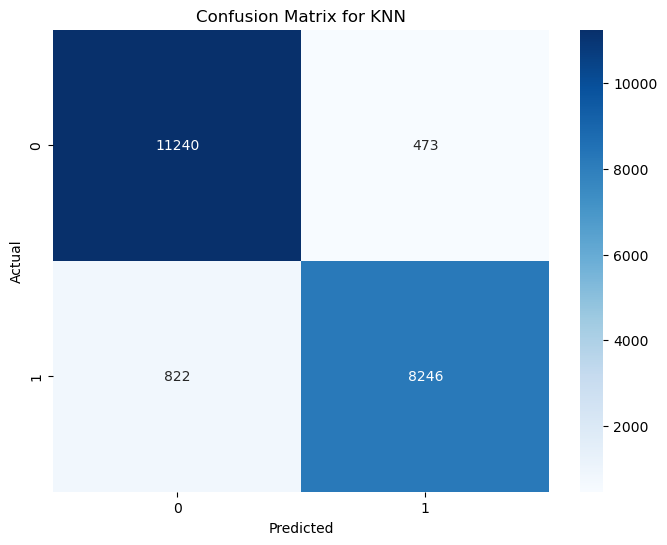

<Figure size 640x480 with 0 Axes>

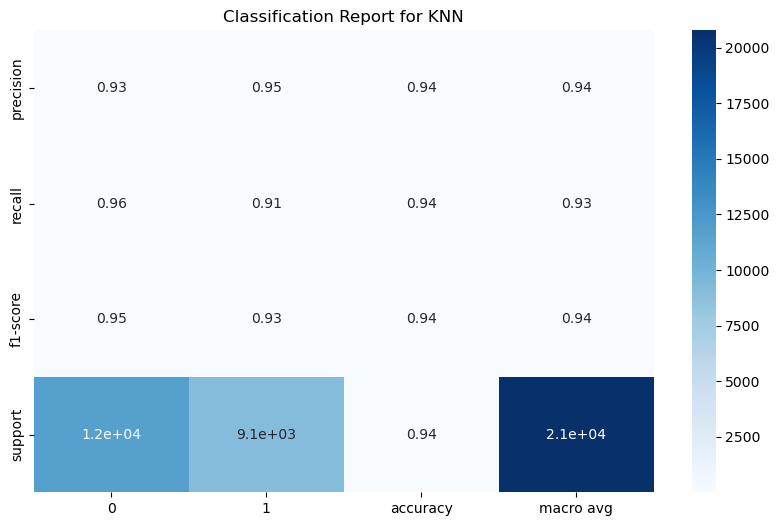

<Figure size 640x480 with 0 Axes>

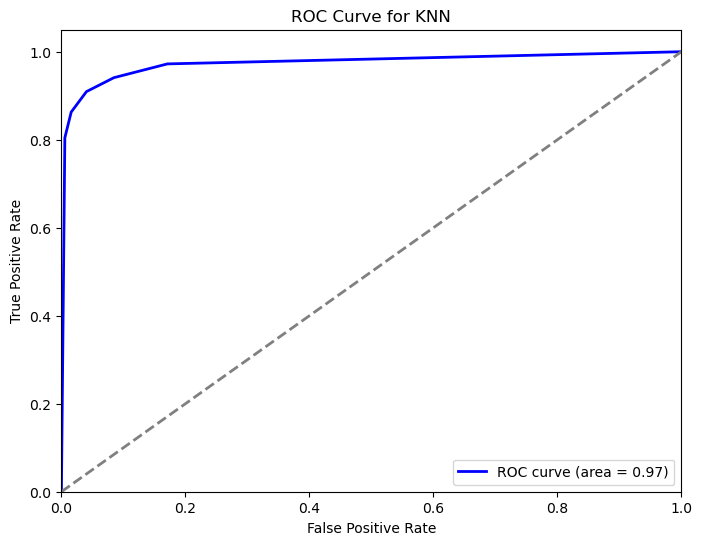

🏃 View run KNN at: http://127.0.0.1:5000/#/experiments/534474054432045102/runs/125d08ca42794e3494631690632f2f04
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/534474054432045102


2025/01/22 18:52:36 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'


Model Name: DT

Accuracy Score For Training Data: 0.962705869614908
Accuracy Score For Testing Data: 0.9442279004860209
Confusion Matrix For Training Data:
[[46178   988]
 [ 2112 33845]]
Confusion Matrix For Testing Data:
[[11284   429]
 [  730  8338]]
Classification Report For Training Data:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     47166
           1       0.97      0.94      0.96     35957

    accuracy                           0.96     83123
   macro avg       0.96      0.96      0.96     83123
weighted avg       0.96      0.96      0.96     83123

Classification Report For Testing Data:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     11713
           1       0.95      0.92      0.94      9068

    accuracy                           0.94     20781
   macro avg       0.95      0.94      0.94     20781
weighted avg       0.94      0.94      0.94     20781

------------

2025/01/22 18:52:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


<Figure size 640x480 with 0 Axes>

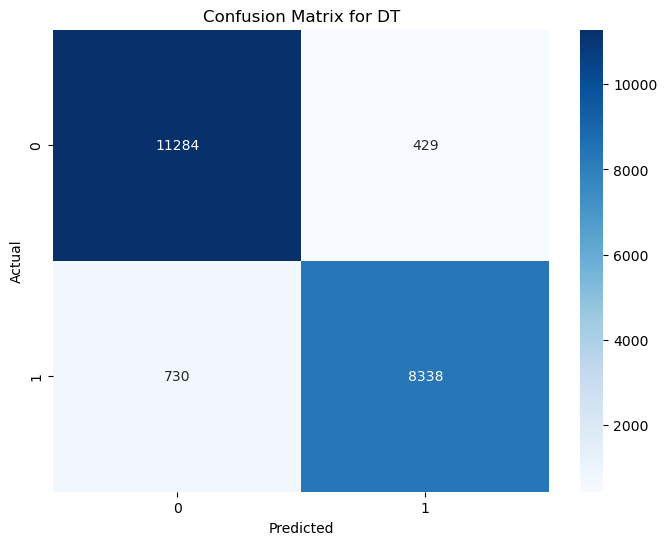

<Figure size 640x480 with 0 Axes>

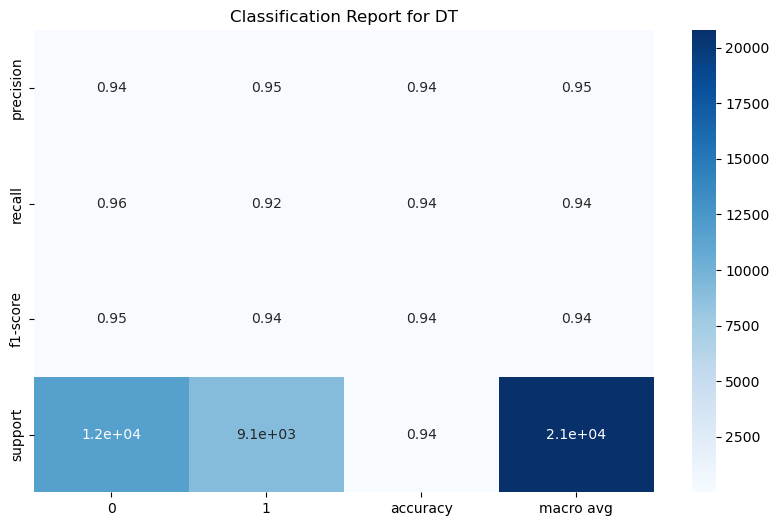

<Figure size 640x480 with 0 Axes>

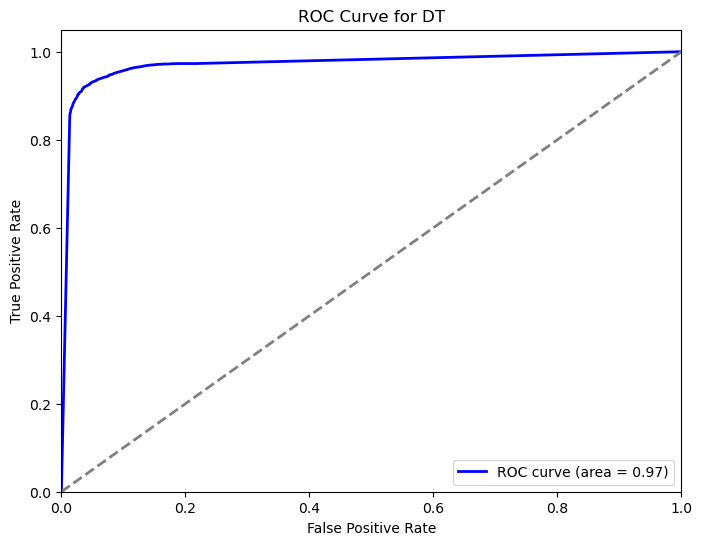

🏃 View run DT at: http://127.0.0.1:5000/#/experiments/534474054432045102/runs/ac08ff4017144a28bc52555b2a554c0e
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/534474054432045102


2025/01/22 18:53:03 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'


Model Name: RF

Accuracy Score For Training Data: 0.962705869614908
Accuracy Score For Testing Data: 0.9473557576632501
Confusion Matrix For Training Data:
[[46021  1145]
 [ 1955 34002]]
Confusion Matrix For Testing Data:
[[11299   414]
 [  680  8388]]
Classification Report For Training Data:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     47166
           1       0.97      0.95      0.96     35957

    accuracy                           0.96     83123
   macro avg       0.96      0.96      0.96     83123
weighted avg       0.96      0.96      0.96     83123

Classification Report For Testing Data:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     11713
           1       0.95      0.93      0.94      9068

    accuracy                           0.95     20781
   macro avg       0.95      0.94      0.95     20781
weighted avg       0.95      0.95      0.95     20781

------------

2025/01/22 18:54:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


<Figure size 640x480 with 0 Axes>

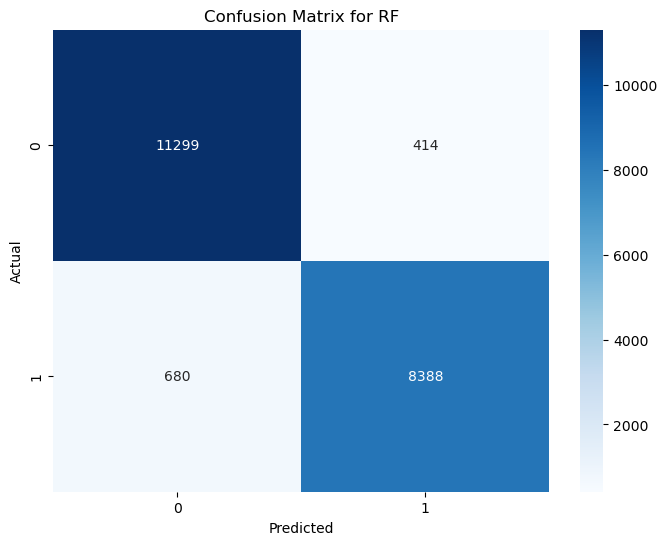

<Figure size 640x480 with 0 Axes>

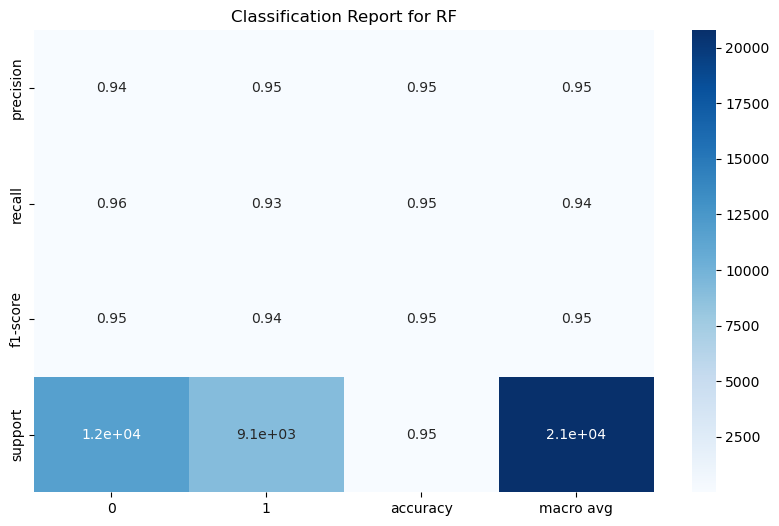

<Figure size 640x480 with 0 Axes>

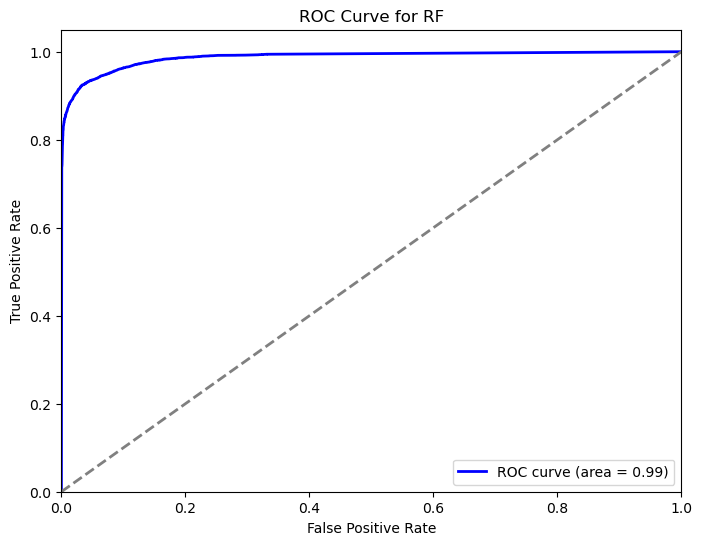

🏃 View run RF at: http://127.0.0.1:5000/#/experiments/534474054432045102/runs/97ccee2f75b346539ea619c146f6ab07
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/534474054432045102
Model Name: XGB



2025/01/22 18:54:37 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\user\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [18:54:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats."


Accuracy Score For Training Data: 0.9546214645765914
Accuracy Score For Testing Data: 0.9488956258120398
Confusion Matrix For Training Data:
[[45872  1294]
 [ 2478 33479]]
Confusion Matrix For Testing Data:
[[11354   359]
 [  703  8365]]
Classification Report For Training Data:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     47166
           1       0.96      0.93      0.95     35957

    accuracy                           0.95     83123
   macro avg       0.96      0.95      0.95     83123
weighted avg       0.95      0.95      0.95     83123

Classification Report For Testing Data:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     11713
           1       0.96      0.92      0.94      9068

    accuracy                           0.95     20781
   macro avg       0.95      0.95      0.95     20781
weighted avg       0.95      0.95      0.95     20781

---------------------------

2025/01/22 18:54:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


<Figure size 640x480 with 0 Axes>

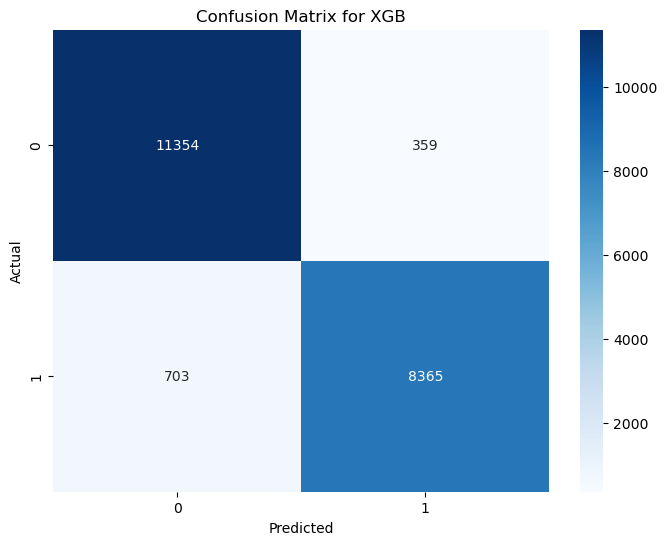

<Figure size 640x480 with 0 Axes>

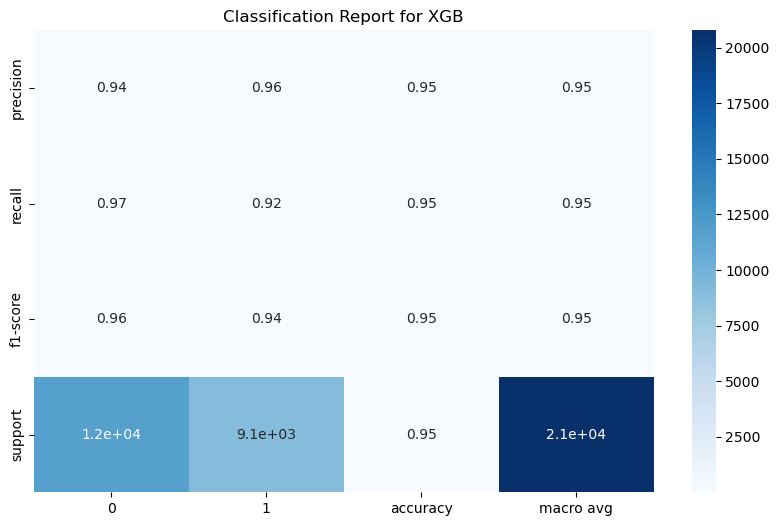

<Figure size 640x480 with 0 Axes>

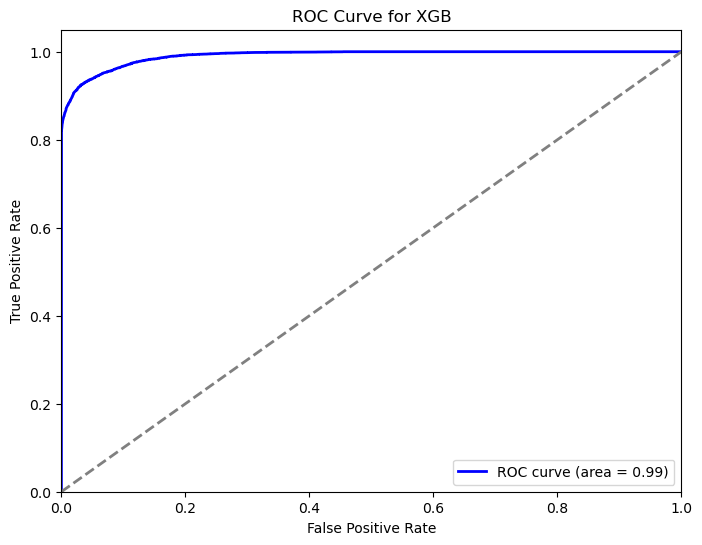

🏃 View run XGB at: http://127.0.0.1:5000/#/experiments/534474054432045102/runs/72aca62fcc134295a82c913167389e1c
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/534474054432045102
  Model  Train Accuracy  Test Accuracy  Precision    Recall  F1-Score
0    LR        0.860809       0.864203   0.863998  0.864203  0.863936
1   KNN        0.948029       0.937683   0.937917  0.937683  0.937529
2    DT        0.962706       0.944228   0.944399  0.944228  0.944111
3    RF        0.962706       0.947356   0.947480  0.947356  0.947259
4   XGB        0.954621       0.948896   0.949180  0.948896  0.948771


<Figure size 640x480 with 0 Axes>

In [52]:
import mlflow
import mlflow.sklearn
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

# Set the tracking URI to a local file system
mlflow.set_tracking_uri("http://127.0.0.1:5000/")

# Set the experiment name
experiment_name = "Customer_Satisfaction_Prediction"
mlflow.set_experiment(experiment_name)

# Enable autologging
mlflow.autolog()

# Define independent variables (X) and target variable (y)
X = df_new.drop(['satisfaction'], axis=1)
y = df_new['satisfaction']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
models = {
    'LR': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'DT': DecisionTreeClassifier(),
    'RF': RandomForestClassifier(),
    'XGB': XGBClassifier()
}

results = []

for name, model in models.items():
    with mlflow.start_run(run_name=name):
        print(f'Model Name: {name}\n')
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)

        train_accuracy = accuracy_score(y_train, y_pred_train)
        test_accuracy = accuracy_score(y_test, y_pred_test)
        precision = classification_report(y_test, y_pred_test, output_dict=True)['weighted avg']['precision']
        recall = classification_report(y_test, y_pred_test, output_dict=True)['weighted avg']['recall']
        f1_score = classification_report(y_test, y_pred_test, output_dict=True)['weighted avg']['f1-score']

        # Printing results
        print(f'Accuracy Score For Training Data: {train_accuracy}')
        print(f'Accuracy Score For Testing Data: {test_accuracy}')
        
        print(f'Confusion Matrix For Training Data:\n{confusion_matrix(y_train, y_pred_train)}')
        print(f'Confusion Matrix For Testing Data:\n{confusion_matrix(y_test, y_pred_test)}')
        
        print(f'Classification Report For Training Data:\n{classification_report(y_train, y_pred_train)}')
        print(f'Classification Report For Testing Data:\n{classification_report(y_test, y_pred_test)}')
        print('-'*100)

        results.append({
            'Model': name,
            'Train Accuracy': train_accuracy,
            'Test Accuracy': test_accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1_score
        })

        # Log parameters, metrics, and model
        mlflow.log_param("model_name", name)
        mlflow.log_metric("train_accuracy", train_accuracy)
        mlflow.log_metric("test_accuracy", test_accuracy)
        mlflow.log_metric("precision", precision)
        mlflow.log_metric("recall", recall)
        mlflow.log_metric("f1_score", f1_score)
        mlflow.sklearn.log_model(model, "model")

        # Confusion Matrix Plot 
        conf_matrix = confusion_matrix(y_test, y_pred_test)
        fig, ax = plt.subplots(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax)
        ax.set_xlabel('Predicted')
        ax.set_ylabel('Actual')
        ax.set_title(f'Confusion Matrix for {name}')
        plt.show()
        plt.savefig(f'confusion_matrix_{name}.png')
        mlflow.log_artifact(f'confusion_matrix_{name}.png')
        plt.close(fig)

        # Classification Report Plot
        report = classification_report(y_test, y_pred_test, output_dict=True)
        report_df = pd.DataFrame(report).transpose()
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap='Blues', ax=ax)
        ax.set_title(f'Classification Report for {name}')
        plt.show()
        plt.savefig(f'classification_report_{name}.png')
        mlflow.log_artifact(f'classification_report_{name}.png')
        plt.close(fig)

        # ROC Curve Plot
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)

        fig, ax = plt.subplots(figsize=(8, 6))
        ax.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        ax.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title(f'ROC Curve for {name}')
        ax.legend(loc="lower right")
        plt.show()
        plt.savefig(f'roc_curve_{name}.png')
        mlflow.log_artifact(f'roc_curve_{name}.png')
        plt.close(fig)

# Convert results to a DataFrame and print it
results_df = pd.DataFrame(results)
print(results_df)


In [54]:
# Display the results DataFrame
print(results_df)

# Identify the best model based on Test Accuracy
best_model = results_df.loc[results_df['Test Accuracy'].idxmax()]
print(f"Best Model based on Test Accuracy:\n{best_model}")


  Model  Train Accuracy  Test Accuracy  Precision    Recall  F1-Score
0    LR        0.860809       0.864203   0.863998  0.864203  0.863936
1   KNN        0.948029       0.937683   0.937917  0.937683  0.937529
2    DT        0.962706       0.944228   0.944399  0.944228  0.944111
3    RF        0.962706       0.947356   0.947480  0.947356  0.947259
4   XGB        0.954621       0.948896   0.949180  0.948896  0.948771
Best Model based on Test Accuracy:
Model                  XGB
Train Accuracy    0.954621
Test Accuracy     0.948896
Precision          0.94918
Recall            0.948896
F1-Score          0.948771
Name: 4, dtype: object


## Model Registration

In [93]:
model_name = "Random Forest Classifier"
run_id = input('Please type RunID')
model_uri = f'runs:/{run_id}/model_name'

with mlflow.start_run(run_id=run_id):
    mlflow.register_model(model_uri=model_uri,name=model_name)

Please type RunID e1265ce505c645928ece41c1da51e208


Registered model 'Random Forest Classifier' already exists. Creating a new version of this model...
2025/01/16 14:54:32 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Random Forest Classifier, version 2


🏃 View run RF at: http://127.0.0.1:5000/#/experiments/534474054432045102/runs/e1265ce505c645928ece41c1da51e208
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/534474054432045102


Created version '2' of model 'Random Forest Classifier'.


In [94]:
model_name = "XGB Classifier"
run_id = input('Please type RunID')
model_uri = f'runs:/{run_id}/model_name'

with mlflow.start_run(run_id=run_id):
    mlflow.register_model(model_uri=model_uri,name=model_name)

Please type RunID 57defa00ad2d4fe0a497ff747b52176f


Registered model 'XGB Classifier' already exists. Creating a new version of this model...
2025/01/16 14:55:16 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: XGB Classifier, version 2


🏃 View run XGB at: http://127.0.0.1:5000/#/experiments/534474054432045102/runs/57defa00ad2d4fe0a497ff747b52176f
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/534474054432045102


Created version '2' of model 'XGB Classifier'.


In [95]:
model_name = "Logistic Regression"
run_id = input('Please type RunID')
model_uri = f'runs:/{run_id}/model_name'

with mlflow.start_run(run_id=run_id):
    mlflow.register_model(model_uri=model_uri,name=model_name)
    

Please type RunID 75757f932b25411886336154a886dc22


Registered model 'Logistic Regression' already exists. Creating a new version of this model...
2025/01/16 14:56:02 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Logistic Regression, version 2


🏃 View run LR at: http://127.0.0.1:5000/#/experiments/534474054432045102/runs/75757f932b25411886336154a886dc22
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/534474054432045102


Created version '2' of model 'Logistic Regression'.


In [96]:
model_name = "K Neighbors Classifier"
run_id = input('Please type RunID')
model_uri = f'runs:/{run_id}/model_name'

with mlflow.start_run(run_id=run_id):
    mlflow.register_model(model_uri=model_uri,name=model_name)

Please type RunID 335d4639f528467180666bfcd8ba5ac5


Successfully registered model 'K Neighbors Classifier'.
2025/01/16 14:58:53 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: K Neighbors Classifier, version 1


🏃 View run KNN at: http://127.0.0.1:5000/#/experiments/534474054432045102/runs/335d4639f528467180666bfcd8ba5ac5
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/534474054432045102


Created version '1' of model 'K Neighbors Classifier'.


In [68]:
# Save the model
with open("xgb_model.pkl", "wb") as f:
    pickle.dump(xgb_model, f)